In [1]:
# Imports!
import matplotlib.pyplot as plt
import numpy as np
from util import open_pckl_file, load_dir
import seaborn as sns

In [3]:
# Load in the pickle file with all the precomputed nearest neighbor distances.
hotel_files = load_dir('./datasets/0.1k/datasets/same_diff_hotel')

In [4]:
# To start, let's get the distribution of distances in each class and the distance ratios
            # we track: (distance, descriptor, xys, hid, iid)
hotel = open_pckl_file(hotel_files[0])
same_distances = []
diff_distances = []
ratios = []
for i in range(len(hotel[1])):
    same_distances.append(hotel[1][i][0])
    diff_distances.append(hotel[2][i][0])
    #  THE RATIO WE'RE CONSIDERING HERE IS DIFF_DIST / SAME_DIST (so high values correspond to *good* points)
    ratios.append(hotel[2][i][0] / hotel[1][i][0])

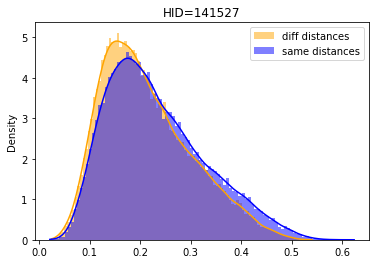

In [10]:
# Now let's plot the densities for the two sets of distances
fig, ax = plt.subplots()
sns.histplot(diff_distances,label='diff distances', bins=100, ax=ax, kde=True, stat="density", linewidth=0, color='orange')
sns.histplot(same_distances,label='same distances', bins=100, ax=ax, kde=True, stat="density", linewidth=0, color='blue')
plt.title('HID={}'.format(hotel[1][0][3]))
plt.legend()
plt.show()
#plt.savefig('{}.png'.format( ))
#plt.close()

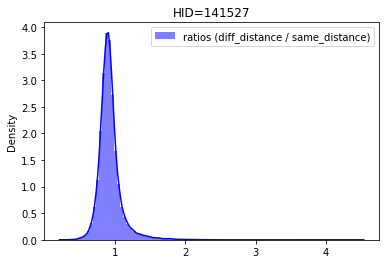

In [11]:
# Now let's also check out the more relevant (to our labelling scheme) data: the ratios
fig, ax = plt.subplots()
sns.histplot(ratios,label='ratios (diff_distance / same_distance)', bins=100, ax=ax, kde=True, stat="density", linewidth=0, color='blue')
plt.title('HID={}'.format(hotel[1][0][3]))
plt.legend()
plt.show()
#plt.savefig('{}.png'.format( ))
#plt.close()

In [15]:
print("Among the {} total points...".format(len(ratios)))

# Let's get the mean and median
print("The mean is {} and the median is {}".format(round(np.mean(ratios),4), round(np.median(ratios),4)))

# Seems like there is quite a long tail after, say, 2... how many points are there?
above1 = []
above2 = []
above2p5 = []
for r in ratios:
    if r > 2.5:
        above2p5.append(r)
        above2.append(r)
        above1.append(r)
    elif r > 2:
        above2.append(r)
        above1.append(r)
    elif r > 1:
        above1.append(r)
print("There are {} ratios above 1, {} ratios above 2, and {} ratios above 2.5".format(len(above1), len(above2), len(above2p5)))
print("This corresponds to a proportion of {} above 1, {} above 2, and {} above 2.5".format(round(len(above1)/len(ratios),4),
                                                            round(len(above2)/len(ratios),4), round(len(above2p5)/len(ratios),4)))

Among the 51824 total points...
The mean is 0.9306 and the median is 0.9091
There are 11010 ratios above 1, 98 ratios above 2, and 22 ratios above 2.5
This corresponds to a proportion of 0.2124 above 1, 0.0019 above 2, and 0.0004 above 2.5
